In [72]:
import pandas as pd 

In [73]:
df=pd.read_excel('ashu.xls' )

In [74]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [75]:
print (df.shape)

(45211, 17)


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [77]:
import matplotlib.pyplot as plt
import numpy as np

In [78]:
import altair as alt

In [79]:
filter_mask=df['y']  == 'yes'
banksub1= df[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

In [80]:
alt.Chart(banksub1).mark_line().encode(x='age' , y='agegrp')

alt.Chart(...)

In [81]:
import plotly.express as px


fig = px.line(banksub1, x="age", y="agegrp", title='Age based prospensity')
fig.show()

In [82]:
#Getting another prespective

In [83]:
agetot=df.groupby('age')['y'].agg(agetot='count').reset_index()

In [84]:
agetot.head()

,age,agetot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [85]:
#Now group the data by both age and prospensity of purchase and find the total counts under each category of prospensity which are 'YES' or 'NO'

In [86]:
ageprop= df.groupby(['age','y'])['y'].agg(agecat='count').reset_index()

In [87]:
ageprop

,age,y,agecat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35
...,...,...,...
143,92,yes,2
144,93,yes,2
145,94,no,1
146,95,no,1


In [88]:
agecomb= pd.merge(ageprop,agetot,left_on=['age'], right_on=['age'])
agecomb['catprop'] = (agecomb.agecat/agecomb.agetot)*100

In [89]:
agecomb.head()

,age,y,agecat,agetot,catprop
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [90]:
import plotly.express as px


fig = px.line(agecomb, x="age", y="catprop", title='Age based prospensity')
fig.show()

In [91]:
#Employement status vs Prospensity to buy term deposit

In [92]:
jobtot=df.groupby('job')['y'].agg(jobtot='count').reset_index()

In [93]:
jobtot

,job,jobtot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [94]:
jobprop=df.groupby(['job','y'])['y'].agg(jobcat='count').reset_index()

In [95]:
jobcomb=pd.merge(jobprop,jobtot, on=['job'])

In [96]:
jobcomb['catprop']=(jobcomb.jobcat/jobcomb.jobtot)*100

In [97]:
jobcombyes=jobcomb[jobcomb['y']=='yes']
jobcombno=jobcomb[jobcomb['y']=='no']

In [98]:
xlabels=jobtot['job'].nunique()

In [99]:
jobyes=jobcombyes['catprop'].unique()
jobno=jobcombno['catprop'].unique()

In [100]:
ind= np.arange(xlabels)

In [101]:
width=0.35

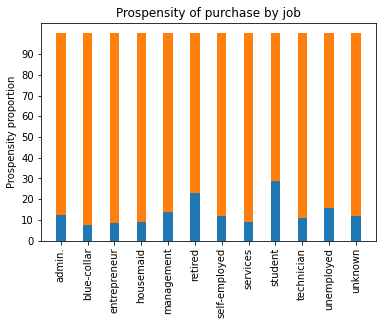

In [102]:
p1=plt.bar(ind,jobyes,width)
p2=plt.bar(ind,jobno,width,bottom=jobyes)
plt.ylabel('Prospensity proportion')
plt.title('Prospensity of purchase by job')
plt.xticks(ind,jobtot['job'].unique())
plt.yticks(np.arange(0,100,10))

plt.xticks(rotation=90)
plt.show()

In [103]:
#Business driven feature engineering 

In [104]:
df.groupby(['housing','y'])['y'].agg(housetot='count').reset_index()

,housing,y,housetot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


In [105]:
df.groupby(['loan','y'])['y'].agg(loantot='count').reset_index()

,loan,y,loantot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In [106]:
#Convert numerical values in ordinal value
import numpy as np
np.quantile(df['balance'],[0.25,0.5,0.75])

array([  72.,  448., 1428.])

In [107]:
#Convert the numerical values of bank balances into categorical values.

In [108]:
df['balanceClass'] = 'Quant1'

df.loc[(df['balance'] > 72) & (df['balance'] < 448), 'balanceClass'] = 'Quant2'

df.loc[(df['balance'] > 448) & (df['balance'] < 1428), 'balanceClass'] = 'Quant3'

df.loc[df['balance'] > 1428, 'balanceClass'] = 'Quant4'

In [109]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [111]:
balancetot=df.groupby(['balanceClass'])['y'].agg(balancetot='count').reset_index()

In [112]:
balancetot

,balanceClass,balancetot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [113]:
balanceprop = df.groupby(['balanceClass','y'])['y'].agg(balancecat='count').reset_index()

In [114]:
balanceprop

,balanceClass,y,balancecat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884
5,Quant3,yes,1415
6,Quant4,no,9472
7,Quant4,yes,1825


In [115]:
balancecomb= pd.merge(balanceprop,balancetot, on=['balanceClass'])
balancecomb['catprop']=(balancecomb.balancecat/balancecomb.balancetot)*100

In [116]:
balancecomb

,balanceClass,y,balancecat,balancetot,catprop
0,Quant1,no,10517,11340,92.742504
1,Quant1,yes,823,11340,7.257496
2,Quant2,no,10049,11275,89.126386
3,Quant2,yes,1226,11275,10.873614
4,Quant3,no,9884,11299,87.476768
5,Quant3,yes,1415,11299,12.523232
6,Quant4,no,9472,11297,83.845269
7,Quant4,yes,1825,11297,16.154731


In [117]:
#we can observe is that people with more cash in hand(no loans no higher balance) have a higher prospensity to but term deposits

In [ ]:
# Normalising data
from sklearn import preprocessing
x = df[['balance']].values.astype(float)
# Creating the scaling function
minmaxScaler = preprocessing.MinMaxScaler()
# Transforming the balance data by normalising it with minmaxScalre
df['balanceTran'] = minmaxScaler.fit_transform(x)
# Printing the head of the data
df.head()

In [120]:
# Adding a small numerical constant to eliminate 0 values

df['balanceTran'] = df['balanceTran'] + 0.00001

In [121]:
# Let us transform values for loan data
df['loanTran'] = 1
# Giving a weight of 5 if there is no loan
df.loc[df['loan'] == 'no', 'loanTran'] = 5
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5


In [123]:
# Let us transform values for Housing data
df['houseTran'] = 5
# Giving a weight of 1 if the customer has a house
df.loc[df['housing'] == 'no', 'houseTran'] = 1

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,Quant4,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,Quant1,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,Quant1,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,Quant4,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,Quant1,0.072822,5,1


In [124]:
# Let us now create the new variable which is a product of all these
df['assetIndex'] = df['balanceTran'] * df['loanTran'] * df['houseTran']
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112


In [126]:
# Finding the quantile
np.quantile(df['assetIndex'],[0.25,0.5,0.75])

array([0.37668646, 0.56920367, 1.9027249 ])

In [127]:
# Creating quantiles from the assetindex data
df['assetClass'] = 'Quant1'

df.loc[(df['assetIndex'] > 0.38) & (df['assetIndex'] < 0.57), 'assetClass'] = 'Quant2'

df.loc[(df['assetIndex'] > 0.57) & (df['assetIndex'] < 1.9), 'assetClass'] = 'Quant3'

df.loc[df['assetIndex'] > 1.9, 'assetClass'] = 'Quant4'

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [128]:
# Calculating total of each asset class
assetTot = df.groupby('assetClass')['y'].agg(assetTot='count').reset_index()
# Calculating the category wise counts
assetProp = df.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()

In [129]:
# Merging both the data frames
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10921,12212,89.428431
1,Quant1,yes,1291,12212,10.571569
2,Quant2,no,8436,10400,81.115385
3,Quant2,yes,1964,10400,18.884615
4,Quant3,no,10144,11121,91.214819
5,Quant3,yes,977,11121,8.785181
6,Quant4,no,10421,11478,90.791079
7,Quant4,yes,1057,11478,9.208921


In [130]:
print ( df.dtypes)

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object


In [131]:
bankNumeric = df[['age','balance','day','duration','campaign','pdays','previous']]

In [132]:
from pandas import set_option

In [133]:
set_option('display.width',150)
set_option('precision',3)
bankCorr = bankNumeric.corr(method = 'pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


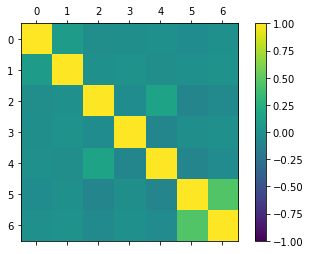

In [134]:
# Plotting the correlation matrix

from matplotlib import pyplot

corFig = pyplot.figure()
figAxis = corFig.add_subplot(111)
corAx = figAxis.matshow(bankCorr,vmin=-1,vmax=1)
corFig.colorbar(corAx)
pyplot.show()

In [135]:
bankNumeric.skew()

age          0.685
balance      8.360
day          0.093
duration     3.144
campaign     4.899
pdays        2.616
previous    41.846
dtype: float64

In [137]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



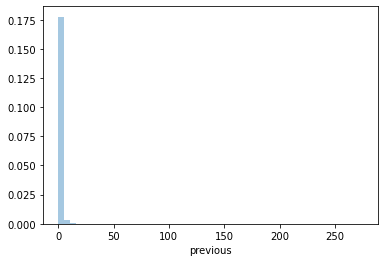

In [138]:
sns.distplot(bankNumeric['previous'])

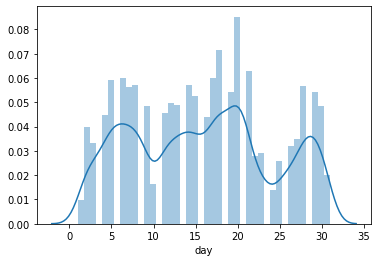

In [139]:
sns.distplot(bankNumeric['day'])

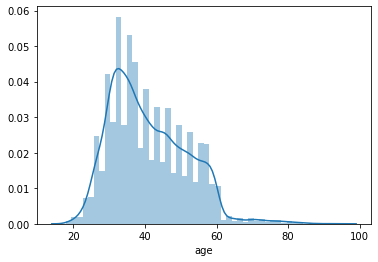

In [140]:
sns.distplot(bankNumeric['age'])

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [142]:
# Converting all the categorical variables to dummy variables
bankCat = pd.get_dummies(df[['job','marital','education','default','housing','loan','contact','month','poutcome']])

In [144]:
# Seperating the numerical variables
bankNum = df[['age','balance','day','duration','campaign','pdays','previous']]
bankNum.shape

(45211, 7)

In [146]:
# Preparing the X variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
# Preparing the Y variable
Y = df['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,33,1,5,198,1,-1,0


In [147]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [148]:
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [149]:
pred = bankModel.predict(X_test)
print('Accuracy of Logisticr regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logisticr regression model prediction on test set: 0.89


In [150]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11754   244]
 [ 1242   324]]


In [151]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11754   244]
 [ 1242   324]]


In [152]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11754   244]
 [ 1242   324]]
